## **Deep Neural Network**

CNN

In [2]:
import numpy as np 
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets,layers,models

In [3]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [14]:
X_test.shape
# X_train.shape

(10000, 32, 32, 3)

In [29]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

Reshaping to 1-D array

In [30]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [31]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [42]:
def plot_sample(X,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

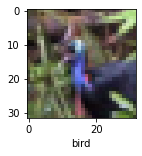

In [43]:
plot_sample(X_train,y_train,24)

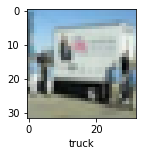

In [44]:
plot_sample(X_train, y_train, 76)

**Normalizing the training data**

In [45]:
#Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255.
#Hence to normalize in 0-->1 range, we need to divide it by 255
X_train=X_train/255
X_test=X_test/255

building a convolutional neural network to train our images

In [47]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


In [48]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [49]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 57s 36ms/step - loss: 1.4563 - accuracy: 0.4793
Epoch 2/10
1563/1563 [==============================] - 56s 36ms/step - loss: 1.1191 - accuracy: 0.6081
Epoch 3/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.9981 - accuracy: 0.6524
Epoch 4/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.9114 - accuracy: 0.6834
Epoch 5/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.8450 - accuracy: 0.7067
Epoch 6/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.7924 - accuracy: 0.7236
Epoch 7/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.7424 - accuracy: 0.7427
Epoch 8/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.6956 - accuracy: 0.7576
Epoch 9/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.6526 - accuracy: 0.7731
Epoch 10/10
1563/1563 [==============================] - 56s 36m

In [50]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.9156 - accuracy: 0.7027


[0.9156069159507751, 0.7027000188827515]

Testing

In [51]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[9.0374536e-04, 2.5953716e-03, 6.8783649e-04, 6.3838100e-01,
        1.3434569e-03, 1.1686072e-01, 5.2469186e-02, 4.9077658e-05,
        4.2868476e-02, 1.4384110e-01],
       [1.3218708e-02, 4.7949057e-02, 3.7042792e-06, 2.5651991e-06,
        3.1373129e-09, 6.3508931e-09, 2.6620912e-08, 1.6265622e-08,
        9.3875176e-01, 7.4093565e-05],
       [8.5198432e-02, 1.6933501e-01, 4.3571959e-04, 3.2406745e-03,
        2.4541619e-05, 1.7394310e-04, 2.0198760e-04, 2.9832107e-04,
        7.1363586e-01, 2.7455579e-02],
       [7.4093837e-01, 3.1181311e-03, 2.7138239e-02, 2.2986505e-04,
        6.9344923e-04, 4.8704055e-07, 5.1076619e-05, 1.9529196e-05,
        2.2776239e-01, 4.8395046e-05],
       [2.9354519e-06, 1.7495458e-05, 2.5935629e-02, 2.7492295e-03,
        6.9175526e-02, 3.8002103e-04, 9.0169477e-01, 1.0748687e-05,
        3.0478073e-05, 3.1758391e-06]], dtype=float32)

In [52]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [56]:
# y_test[:5]
y_test=y_test.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

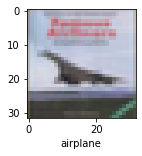

In [57]:
plot_sample(X_test, y_test,3)

In [58]:
classes[y_classes[3]]

'airplane'

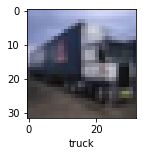

In [59]:
plot_sample(X_test, y_test,34)

In [60]:
classes[y_classes[34]]

'truck'